In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.axisartist.axislines import Subplot 
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv("./data/train (1).csv")

In [81]:
df.head()

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,...,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
1,2016-02-21 23:35:44,2016-02-25 12:19:14,0,0,0,0,0,مغلق,سكني,أرض,...,450,شمال,20,للبيع,0,24.6175,46.5280,Riyadh,UBAYR,Dhahrat Laban
2,2016-01-05 21:26:47,2016-03-05 18:25:43,0,0,5,0,1,مغلق,غير محدد,فيلا,...,750,شرق,20,للبيع,5,24.8131,46.5991,Riyadh,AL WUSAYL,Al Malqa
3,2016-02-04 09:29:46,2016-02-04 09:29:58,0,0,1,0,1,مغلق,غير محدد,فيلا,...,500,شمال,5,للبيع,1,24.6738,46.7369,Riyadh,AR RIYADH,Al Malaz
4,2016-03-28 13:22:12,2016-05-31 16:37:40,4,0,3,2,1,مغلق,غير محدد,شقة,...,0,شمال غربي,35,للإيجار,3,24.8279,46.6451,Riyadh,AD DIR'IYAH,Al Yasmin


## understanding the dataSet

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79975 entries, 0 to 79974
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   creation_datetime          79975 non-null  object 
 1   updated_at                 79975 non-null  object 
 2   age_less_than              79975 non-null  int64  
 3   num_apartments             79975 non-null  int64  
 4   num_bedrooms               79975 non-null  int64  
 5   floor_num                  79975 non-null  int64  
 6   num_kitchens               79975 non-null  int64  
 7   closed                     79975 non-null  object 
 8   commercial_or_residential  79975 non-null  object 
 9   property_type              79975 non-null  object 
 10  driver_room                79975 non-null  object 
 11  duplex                     79975 non-null  object 
 12  family_or_single           79975 non-null  object 
 13  furnished                  79975 non-null  obj

In [51]:
df['region_name_en'].value_counts()

Riyadh    79975
Name: region_name_en, dtype: int64

In [89]:
df.describe()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,num_living_rooms,price_per_meter,price,num_rooms,area,street_width,num_water_cycles,Latitude,Longitude
count,79972.000000,79972.000000,79972.000000,79972.000000,79972.000000,79972.000000,7.997200e+04,7.997200e+04,79972.000000,7.997200e+04,79972.000000,79972.000000,79972.000000,79972.000000
mean,2.577340,1.059983,2.563985,0.447969,0.553381,1.071412,4.164641e+05,9.254415e+08,0.356337,4.439460e+05,16.476504,2.251976,24.746981,46.690730
std,5.696338,3.829926,2.022598,0.958783,0.596274,1.104086,2.937960e+07,7.348926e+10,5.843645,2.681658e+07,17.137557,1.904129,0.113884,0.107781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,24.299600,46.298200
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.500000e+04,0.000000,1.100000e+02,0.000000,0.000000,24.661600,46.615600
50%,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,0.000000e+00,7.000000e+05,0.000000,3.750000e+02,15.000000,2.000000,24.781000,46.680500
75%,2.000000,0.000000,5.000000,1.000000,1.000000,2.000000,0.000000e+00,1.719925e+06,0.000000,6.600000e+02,20.000000,4.000000,24.822000,46.779900
max,36.000000,90.000000,5.000000,20.000000,5.000000,5.000000,2.147480e+09,1.000000e+13,800.000000,2.147484e+09,100.000000,5.000000,25.156200,47.319400


# observing the age of property

In [85]:
df[df['floor_num'] == df['floor_num'].min()]

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,...,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
9602,2015-05-12 20:00:19,2015-05-14 08:38:18,2,0,0,-1,0,مغلق,غير محدد,مكتب تجاري,...,555,شرق,30,للإيجار,0,24.7252,46.8225,Riyadh,AR RIYADH,An Nasim Al Gharbi
42351,2015-05-12 19:58:43,2015-05-14 08:38:26,-1,0,0,-1,0,مغلق,سكني,أرض,...,255,شمال,0,للبيع,0,24.7252,46.8225,Riyadh,AR RIYADH,An Nasim Al Gharbi
56672,2015-04-29 16:51:01,2015-04-29 16:51:01,-1,0,3,-1,3,مغلق,غير محدد,استراحة,...,555,غير محدد,0,للإيجار,3,24.6970,46.8453,Riyadh,AR RIYADH,As Saadah


### these two row doesnot indicate anything so dropping them idea since they are only two rows and that will fix both age_less_than & floor_num

In [87]:
df = df.drop(df[df['floor_num'] == df['floor_num'].min()].index, axis=0)

we can see that most of our house are less than 2 actually  75% of them are under 2 years as the red line shows

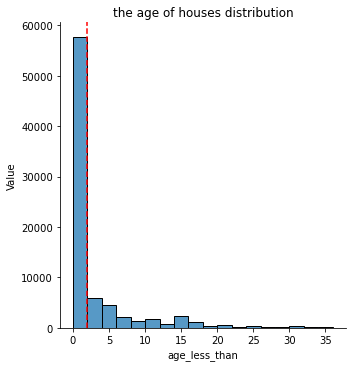

In [88]:
sns.displot(df['age_less_than'] , binwidth=2)
plt.xlabel('age_less_than')
plt.ylabel('Value')
plt.title('the age of houses distribution')

plt.axvline(x=df['age_less_than'].describe()[-2], color='red', linestyle='--')

plt.show()

In [59]:
df['for_rent_or_sale'].value_counts()

للبيع      48685
للإيجار    31290
Name: for_rent_or_sale, dtype: int64

In [64]:
df[df['for_rent_or_sale'] == 'للإيجار']['age_less_than'].describe()

count    31290.000000
mean         2.899105
std          5.204804
min         -1.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         36.000000
Name: age_less_than, dtype: float64

In [48]:
df["num_apartments"].value_counts()

0     63400
2      6051
1      3179
3      2964
4       536
14      431
30      410
8       392
6       365
5       220
7       201
9       172
10      171
11      161
12      160
16      111
24      106
28      104
15      103
18       97
13       94
22       81
21       63
20       63
17       63
27       39
23       37
26       36
19       33
25       32
29       29
42       10
32       10
36        9
60        4
41        4
34        3
56        3
48        3
33        2
47        2
40        2
50        2
39        2
35        2
38        1
37        1
43        1
57        1
55        1
52        1
53        1
90        1
31        1
77        1
51        1
49        1
44        1
Name: num_apartments, dtype: int64

In [54]:
df['num_bedrooms'].value_counts()

0    25591
5    20293
3    13143
4    12786
2     4850
1     3312
Name: num_bedrooms, dtype: int64

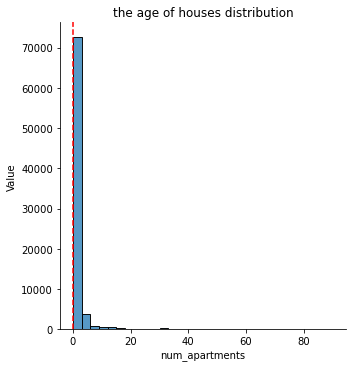

In [41]:
sns.displot(df['num_apartments'] , binwidth=3)
plt.xlabel('num_apartments')
plt.ylabel('Value')
plt.title('the age of houses distribution')

plt.axvline(x=df['num_apartments'].describe()[-2], color='red', linestyle='--')

plt.show()

make comparison between rent and sold